# Importing the Necessary Libraries

In [1]:
#### IMPORTING THE LIBERARIES REQUIRED ####

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import pickle
from sklearn.utils import shuffle  
from sklearn.model_selection import train_test_split

# Loading Training set

In [26]:
#### CONVERTING THE IMAGES TO ARRAYS ####

training_data = []
DATADIR = r"C:\Users\bvraju\Desktop\Covid_19_chest\Covid19-dataset\train"
CATEGORIES = ["Covid","Normal","Viral Pneumonia"]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(100,100))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [27]:
#### creating the labels for the training data ####

X_data=[]
y_data=[]
for x,y in training_data:
    X_label = x
    y_label = y
    X_data.append(X_label)
    y_data.append(y_label)

# saving the labels

In [28]:
#### SAVING THE LABELS TO FILE ####


pickle_out = open('X_LABELS_FOR_GRAYSCALE_IMAGES.pickle','wb')
pickle.dump(X_data, pickle_out)
pickle_out.close()

pickle_out = open('y_LABELS_FOR_GRAYSCALE_IMAGES.pickle', 'wb')
pickle.dump(y_data, pickle_out)
pickle_out.close()

# loading the labels from the saved file

In [2]:

X_Temp = open('X_LABELS_FOR_GRAYSCALE_IMAGES.pickle','rb')
y_Temp = open('y_LABELS_FOR_GRAYSCALE_IMAGES.pickle','rb')
  
X = pickle.load(X_Temp)
y = pickle.load(y_Temp) 
X_Temp.close()
y_Temp.close()

In [3]:
#### KNOWING THE DIMENSIONS OF THE IMAGES AND SIZE OF THE DATA SET ####

print("shape of the image",X[0].shape)
         
X,y = shuffle(X,y, random_state=2)           # Shuffling the data 

   
X = np.array(X).reshape(-1, 100,100, 1)       # reshaping and converting them to array
y = np.array(y).reshape(-1,1)
X = np.array(X/255.0)

print("number of total examples (training + valdation + testing) = ",len(X),len(y))
print(X.shape,y.shape)

shape of the image (100, 100)
number of total examples (training + valdation + testing) =  312 312
(312, 100, 100, 1) (312, 1)


# Splliting the data into Train and Test set

In [4]:
#### SPLLITING THE DATA INTO TRAIN (training set includes validation set) AND TEST SET ####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(249, 100, 100, 1) (63, 100, 100, 1) (249, 1) (63, 1)


# MODEL

In [5]:
#### CREATING THE MODEL ####

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

# TRAINING

In [51]:
#### TRAINING THE MODEL AND TESTING ON VALIDATION SET ####
num_epochs=50
hist = model.fit(X_train,y_train,batch_size=8,epochs=num_epochs,validation_split=0.15) 

Train on 211 samples, validate on 38 samples
Epoch 1/50
211/211 [==============================] - 6s 26ms/sample - loss: 1.1024 - accuracy: 0.3555 - val_loss: 1.0708 - val_accuracy: 0.5526
Epoch 2/50
211/211 [==============================] - 4s 20ms/sample - loss: 1.0638 - accuracy: 0.4218 - val_loss: 0.8464 - val_accuracy: 0.7105
Epoch 3/50
211/211 [==============================] - 4s 21ms/sample - loss: 0.6770 - accuracy: 0.6967 - val_loss: 0.8248 - val_accuracy: 0.6316
Epoch 4/50
211/211 [==============================] - 4s 21ms/sample - loss: 0.3765 - accuracy: 0.8673 - val_loss: 0.4316 - val_accuracy: 0.8421
Epoch 5/50
211/211 [==============================] - 4s 20ms/sample - loss: 0.3021 - accuracy: 0.8815 - val_loss: 0.7560 - val_accuracy: 0.7895
Epoch 6/50
211/211 [==============================] - 4s 20ms/sample - loss: 0.3669 - accuracy: 0.8531 - val_loss: 0.5524 - val_accuracy: 0.8421
Epoch 7/50
211/211 [==============================] - 4s 21ms/sample - loss: 0.2922 -

# VISUALIZING LOSS AND ACCURACY

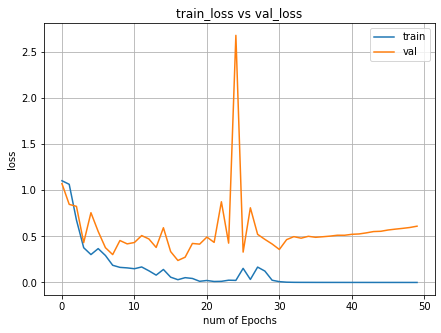

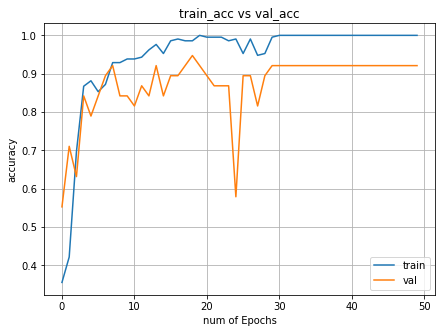

In [52]:
#### VISUALIZING THE LOSS AND ACCURACY ####

import matplotlib.pyplot as plt

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.show()

# Saving the TRAINED weights 

In [8]:
#### SAVING THE TRAINED WEIGHTS (helps to avoid multiple times of training the model) ####

sure = int(input("press 1 to continue..."))
if sure == 1:
    fname = "model_TRAINED_WEIGHTS"
    model.save_weights(fname , overwrite=True)
    print("saved the new weights")
else:
    print("no new weights are saved")    

press 1 to continue...1
saved the new weights


# Loading the TRAINED weights

In [9]:
#### LOADING THE WEIGHTS(this step can be skipped) ####

fname = "model_TRAINED_WEIGHTS"
model.load_weights(fname)

# PREDICTING on TEST SET

In [10]:
#### PREDICTING THE CLASSES FOR THE TEST SET ####

predicted=model.predict_classes([X_test])

print("prediction on ", len(predicted)," images.")

prediction on  63  images.


In [13]:
print("accuracy on test set: ",accuracy_score(predicted,y_test))  

accuracy on test set:  0.9523809523809523


## =================================
#   MODEL ACCURACY 95.23%
## =================================